In [1]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import csv
import hw4
import numpy as np
from scipy.cluster.hierarchy import linkage

df = pd.read_csv("Pokemon.csv")

#hw4.load_data("Pokemon.csv")

In [2]:
with open("Pokemon.csv", 'r') as f:
    dict_reader = csv.DictReader(f)
    list_of_dict = list(dict_reader)
#list_of_dict

In [3]:
pokemon = list_of_dict[0]
x1 = int(pokemon['Attack'])
x2 = int(pokemon['Sp. Atk'])
x3 = int(pokemon['Speed'])
x4 = int(pokemon['Defense'])
x5 = int(pokemon['Sp. Def'])
x6 = int(pokemon['HP'])
np.array([x1,x2,x3,x4,x5,x6], dtype=np.int64)

array([49, 65, 45, 49, 65, 45], dtype=int64)

In [4]:
features = []
for i in range(0,50):
    features.append(hw4.calc_features(list_of_dict[i]))
features

[array([49, 65, 45, 49, 65, 45], dtype=int64),
 array([62, 80, 60, 63, 80, 60], dtype=int64),
 array([ 82, 100,  80,  83, 100,  80], dtype=int64),
 array([100, 122,  80, 123, 120,  80], dtype=int64),
 array([52, 60, 65, 43, 50, 39], dtype=int64),
 array([64, 80, 80, 58, 65, 58], dtype=int64),
 array([ 84, 109, 100,  78,  85,  78], dtype=int64),
 array([130, 130, 100, 111,  85,  78], dtype=int64),
 array([104, 159, 100,  78, 115,  78], dtype=int64),
 array([48, 50, 43, 65, 64, 44], dtype=int64),
 array([63, 65, 58, 80, 80, 59], dtype=int64),
 array([ 83,  85,  78, 100, 105,  79], dtype=int64),
 array([103, 135,  78, 120, 115,  79], dtype=int64),
 array([30, 20, 45, 35, 20, 45], dtype=int64),
 array([20, 25, 30, 55, 25, 50], dtype=int64),
 array([45, 90, 70, 50, 80, 60], dtype=int64),
 array([35, 20, 50, 30, 20, 40], dtype=int64),
 array([25, 25, 35, 50, 25, 45], dtype=int64),
 array([90, 45, 75, 40, 80, 65], dtype=int64),
 array([150,  15, 145,  40,  80,  65], dtype=int64),
 array([45, 

In [5]:
p1 = np.sum(np.array(features)**2, axis=1).reshape(-1,1)
p2 = np.sum(np.array(features)**2, axis=1)
p3 = -2 * np.dot(np.array(features), np.array(features).T)
dist_matrix = np.sqrt(p1 + p2 + p3)
dist_matrix

array([[ 0.        , 35.56683849, 84.52810184, ..., 66.5357047 ,
        19.02629759, 38.0394532 ],
       [35.56683849,  0.        , 48.98979486, ..., 41.80908992,
        39.78693253, 22.53885534],
       [84.52810184, 48.98979486,  0.        , ..., 46.34652091,
        85.92438536, 57.51521538],
       ...,
       [66.5357047 , 41.80908992, 46.34652091, ...,  0.        ,
        76.32168761, 57.87918451],
       [19.02629759, 39.78693253, 85.92438536, ..., 76.32168761,
         0.        , 31.22498999],
       [38.0394532 , 22.53885534, 57.51521538, ..., 57.87918451,
        31.22498999,  0.        ]])

In [6]:
import numpy as np

def hac(features):
    n = len(features)

    # calculate distance matrix
    X = np.array(features)
    p1 = np.sum(np.array(X)**2, axis=1).reshape(-1,1)
    p2 = np.sum(np.array(X)**2, axis=1)
    p3 = -2 * np.dot(np.array(X), np.array(X).T)
    dist_mat = np.sqrt(p1 + p2 + p3)

    # Initialize clusters
    clusters = [[i] for i in range(n)]
    not_exist = []
    all_merged = []
    # Initialize indices of clusters
    cluster_indices = list(range(n))

    # Initialize linkage matrix
    Z = np.zeros((n-1, 4))

    # Loop through all iterations
    for i in range(len(Z)):
        # Find the two clusters with minimum distance
        min_dist = np.inf
        for j in range(len(clusters)):
            for k in range(j+1, len(clusters)):
                dist = np.max(dist_mat[clusters[j],:][:,clusters[k]])
                
                if j in not_exist or k in not_exist:
                    continue
                if dist < min_dist:
                    min_dist = dist
                    merge_clusters = [j, k]

        # Update clusters
        new_cluster = clusters[merge_clusters[0]] + clusters[merge_clusters[1]]

        all_merged.append((new_cluster, i))
        not_exist.append(merge_clusters[0])
        not_exist.append(merge_clusters[1])
        clusters.append(new_cluster)
        # Update indices
        cluster_indices.append(n+i)
        
        # Update linkage matrix column 3 and 4
        Z[i, 2] = min_dist
        Z[i, 3] = len(new_cluster)
        
        # Update linkage matrix column 1 and 2
        if len(new_cluster) == 2:
            Z[i, 0] = new_cluster[0]
            Z[i, 1] = new_cluster[1]
        else:
            if (len(clusters[merge_clusters[0]]) < 2):
                Z[i,0] = merge_clusters[0]
            else:
                Z[i,0] = n + all_merged[([y[0] for y in all_merged].index(clusters[merge_clusters[0]]))][1]
            
            if (len(clusters[merge_clusters[1]]) < 2):
                Z[i,1] = merge_clusters[1]
            else:
                Z[i,1] = n + all_merged[([y[0] for y in all_merged].index(clusters[merge_clusters[1]]))][1]

    return Z

hac(features)

array([[ 20.        ,  46.        ,   8.71779789,   2.        ],
       [ 13.        ,  16.        ,  10.        ,   2.        ],
       [ 14.        ,  17.        ,  10.        ,   2.        ],
       [ 24.        ,  26.        ,  14.03566885,   2.        ],
       [  3.        ,  12.        ,  14.73091986,   2.        ],
       [ 21.        ,  38.        ,  15.42724862,   2.        ],
       [ 22.        ,  47.        ,  16.1245155 ,   2.        ],
       [ 37.        ,  50.        ,  18.16590212,   3.        ],
       [  0.        ,  48.        ,  19.02629759,   2.        ],
       [ 25.        ,  27.        ,  20.42057786,   2.        ],
       [  4.        ,  42.        ,  21.3541565 ,   2.        ],
       [ 35.        ,  55.        ,  21.72556098,   3.        ],
       [  1.        ,  49.        ,  22.53885534,   2.        ],
       [  2.        ,  11.        ,  23.34523506,   2.        ],
       [ 36.        ,  39.        ,  23.70653918,   2.        ],
       [ 28.        ,  57

In [7]:
linkage(features, method = "complete")

array([[ 20.        ,  46.        ,   8.71779789,   2.        ],
       [ 13.        ,  16.        ,  10.        ,   2.        ],
       [ 14.        ,  17.        ,  10.        ,   2.        ],
       [ 24.        ,  26.        ,  14.03566885,   2.        ],
       [  3.        ,  12.        ,  14.73091986,   2.        ],
       [ 21.        ,  38.        ,  15.42724862,   2.        ],
       [ 22.        ,  47.        ,  16.1245155 ,   2.        ],
       [ 37.        ,  50.        ,  18.16590212,   3.        ],
       [  0.        ,  48.        ,  19.02629759,   2.        ],
       [ 25.        ,  27.        ,  20.42057786,   2.        ],
       [  4.        ,  42.        ,  21.3541565 ,   2.        ],
       [ 35.        ,  55.        ,  21.72556098,   3.        ],
       [  1.        ,  49.        ,  22.53885534,   2.        ],
       [  2.        ,  11.        ,  23.34523506,   2.        ],
       [ 36.        ,  39.        ,  23.70653918,   2.        ],
       [ 28.        ,  57

In [8]:
Z = hw4.hac(features)

In [9]:
pokemon = list_of_dict[0]
name = pokemon['Name']

names = []
for i in range(0,50):
    pokemon = list_of_dict[i]
    names.append(pokemon['Name']  )
names

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'VenusaurMega Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'CharizardMega Charizard X',
 'CharizardMega Charizard Y',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'BlastoiseMega Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'BeedrillMega Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'PidgeotMega Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom']

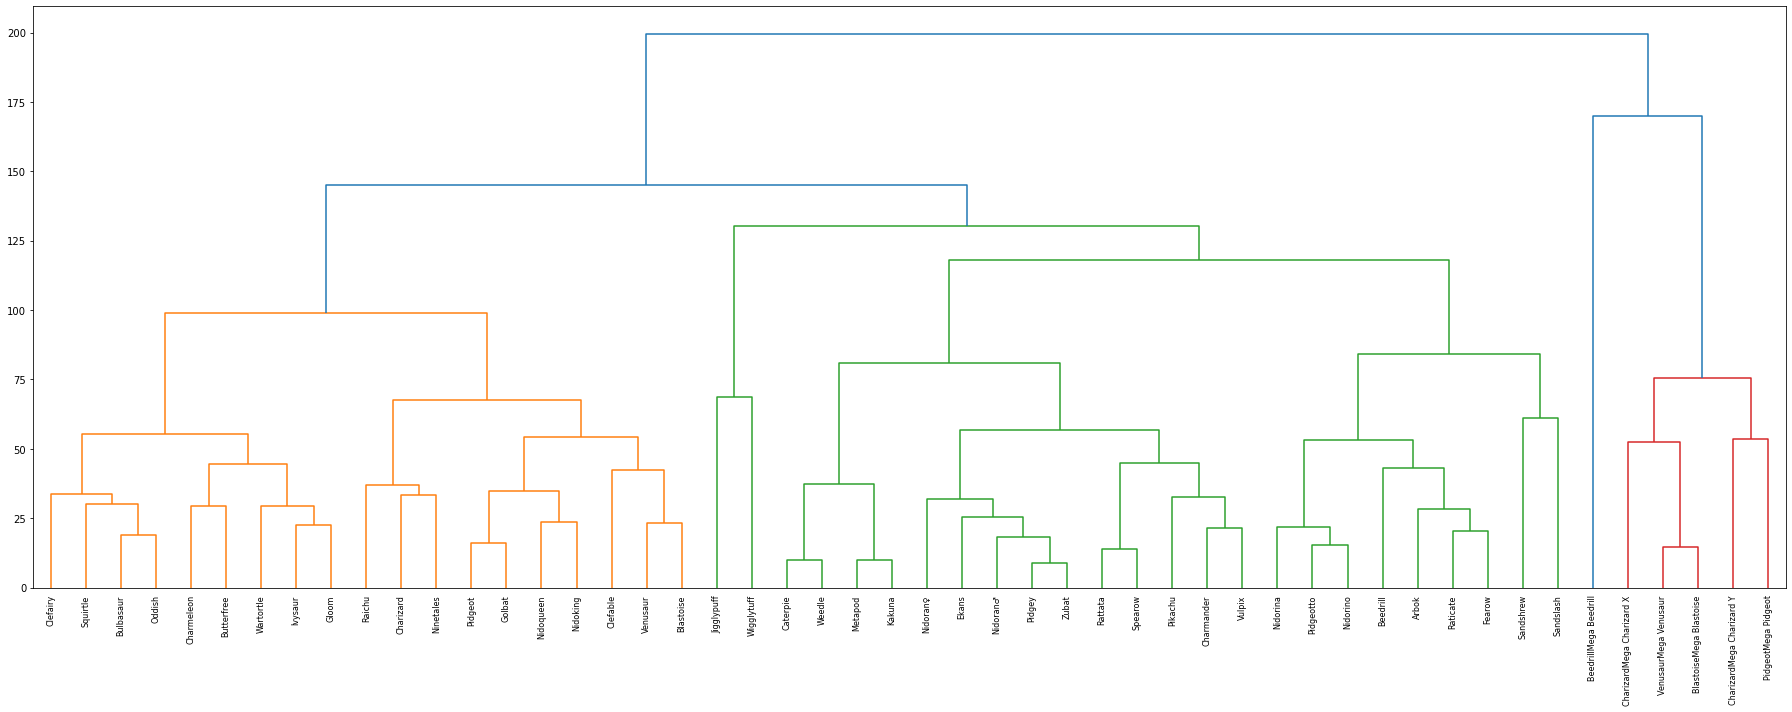

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=names, leaf_rotation=90)
fig.tight_layout()
plt.show()

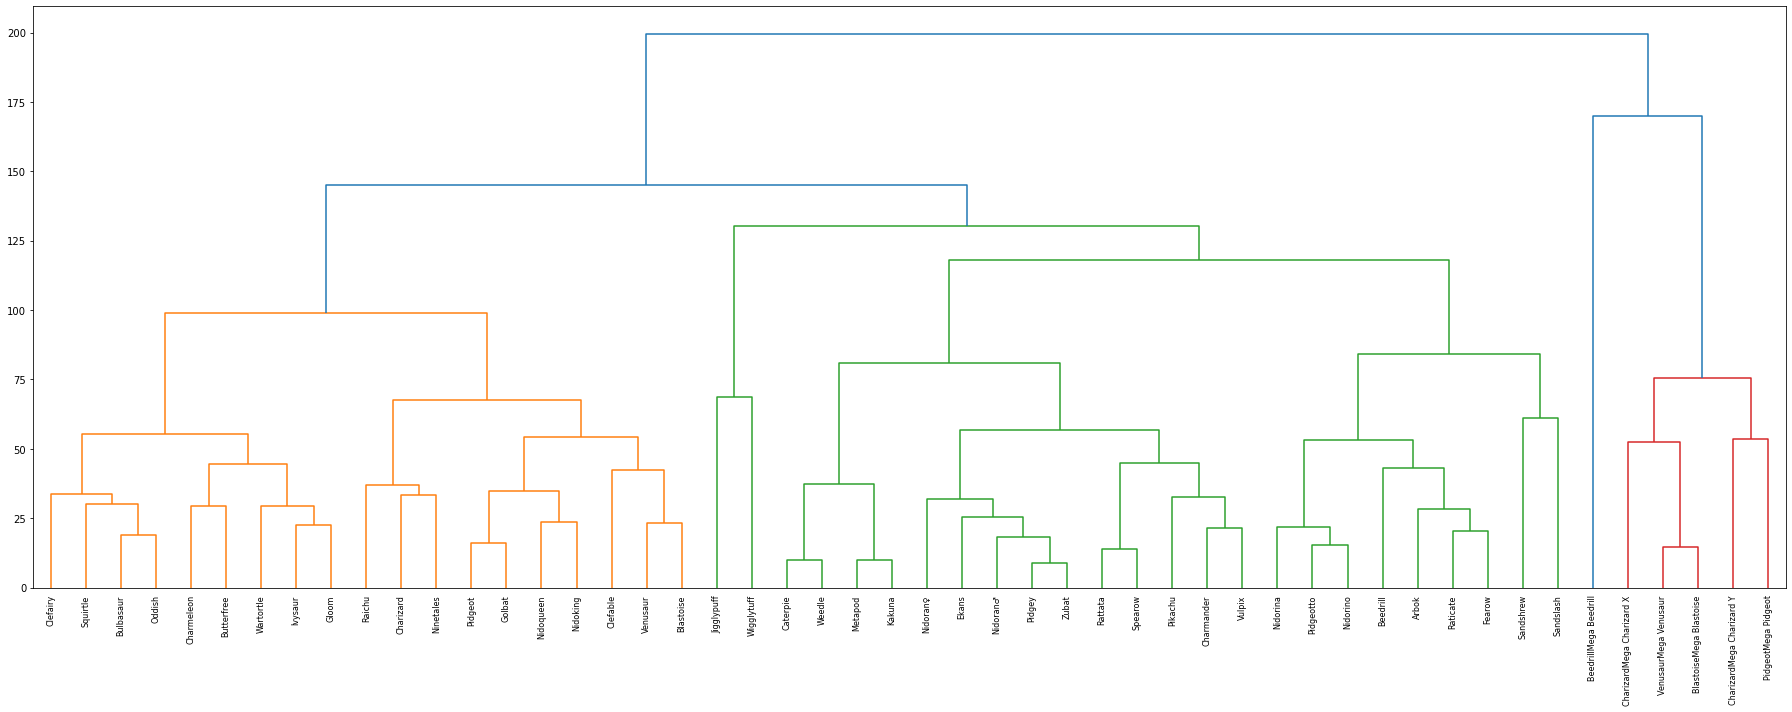

In [11]:
hw4.imshow_hac(Z,names)